In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import chardet
import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()


In [3]:
with open('dataset/spam.csv','rb') as rawdata:
    result=chardet.detect(rawdata.read(1000))
result
ds=pd.read_csv('dataset/spam.csv',encoding='ISO-8859-1')
ds

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## 1 Data Cleaning


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
ds=ds.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [6]:
ds=ds.rename(columns={'v1':'type','v2':'text'})
ds.sample(5)

,type,text
2394,ham,I don't run away frm u... I walk slowly &amp; ...
5188,ham,Okie
107,ham,How would my ip address test that considering ...
4815,ham,Anything is valuable in only 2 situations: Fir...
326,ham,Hi da:)how is the todays class?


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [8]:
ds['type']=encoder.fit_transform(ds['type'])
print(ds['type'])

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: type, Length: 5572, dtype: int32


In [9]:
ds.isnull().sum()

type    0
text    0
dtype: int64

In [10]:
print(ds.duplicated().sum())
ds=ds.drop_duplicates(keep='first')
print(ds.duplicated().sum())

403
0


In [11]:
ds.shape

(5169, 2)

## 2 EDA

In [12]:
ds['type'].value_counts()

0    4516
1     653
Name: type, dtype: int64

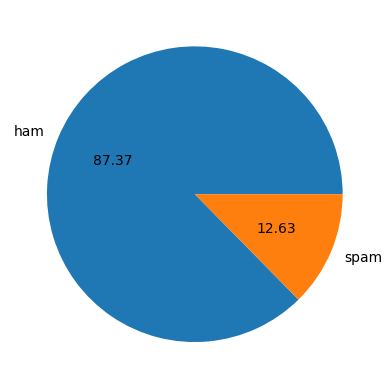

In [13]:
plt.pie(ds['type'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KRG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
ds['num_characters']=ds['text'].apply(len)
ds.head()

,type,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
ds['num_words']=ds['text'].apply(lambda x:len(nltk.word_tokenize(x)))
ds.head()

,type,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [17]:
ds['num_sentences']=ds['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
ds.head()

,type,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
ds[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
ds[ds['type']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
ds[ds['type']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

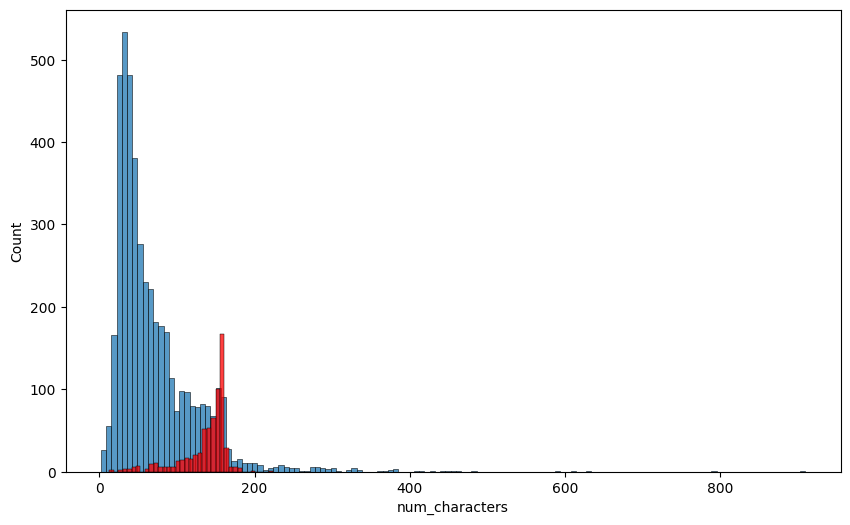

In [21]:
plt.figure(figsize=(10,6))
sns.histplot(ds[ds['type']==0]['num_characters'])
sns.histplot(ds[ds['type']==1]['num_characters'], color="red")

<Axes: xlabel='num_words', ylabel='Count'>

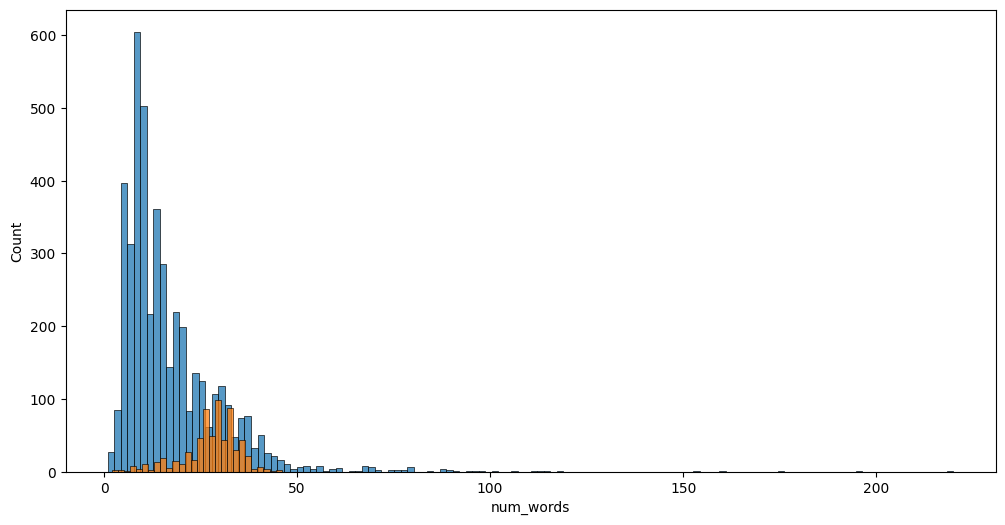

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(ds[ds['type']==0]['num_words'])
sns.histplot(ds[ds['type']==1]['num_words'])

<Axes: xlabel='num_sentences', ylabel='Count'>

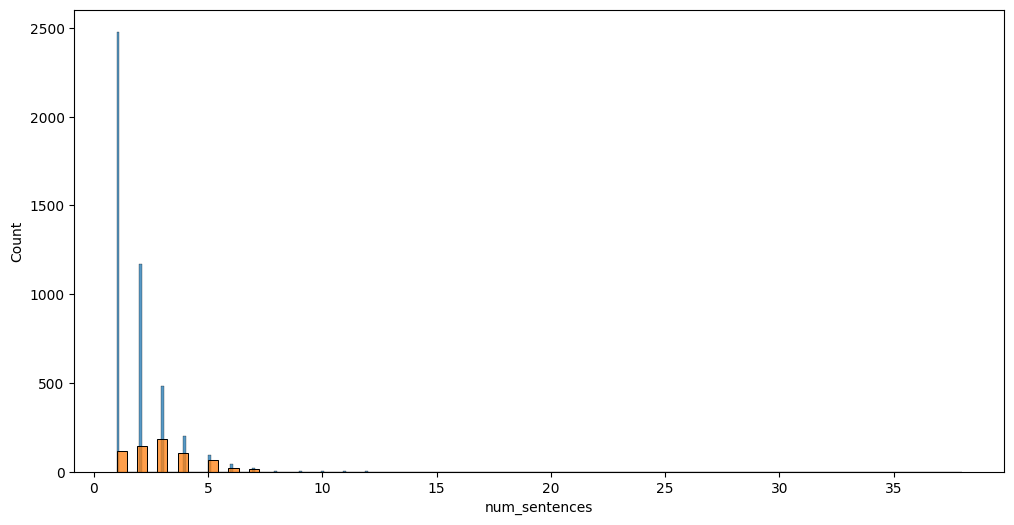

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(ds[ds['type']==0]['num_sentences'])
sns.histplot(ds[ds['type']==1]['num_sentences'])

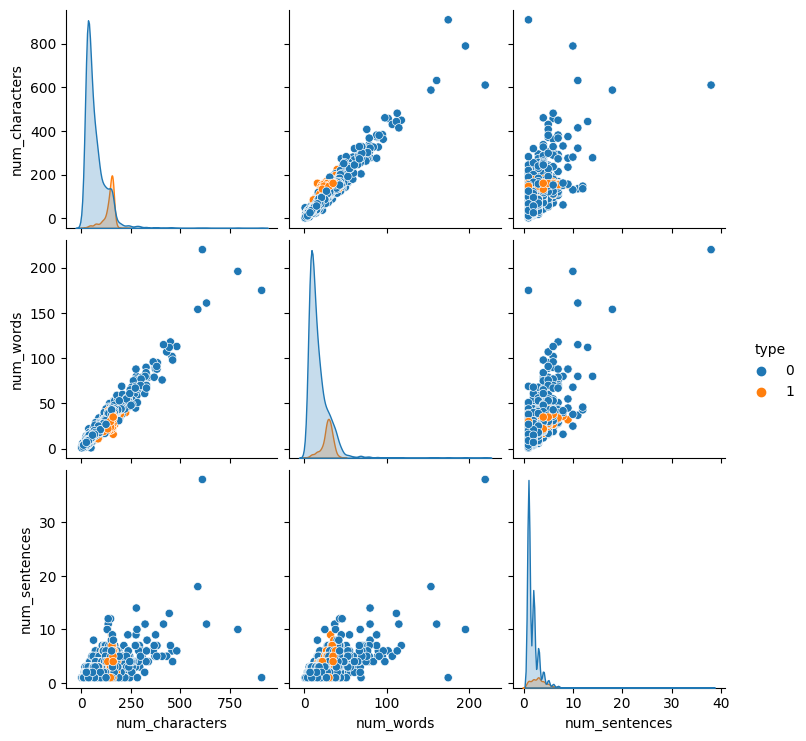

In [24]:
sns.pairplot(ds,hue='type')

C:\Users\KRG\AppData\Local\Temp\ipykernel_11028\1221165314.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ds.corr(),annot=True)


<Axes: >

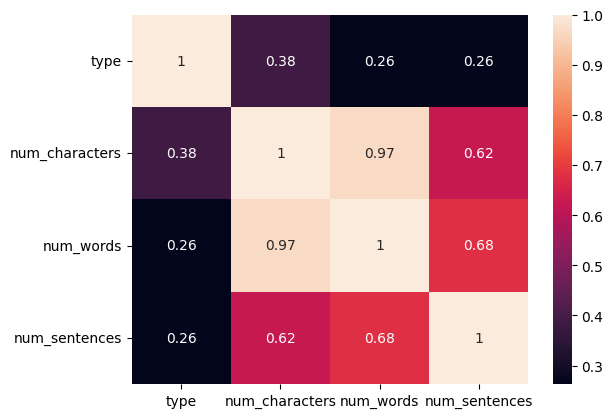

In [25]:
sns.heatmap(ds.corr(),annot=True)

## 3 Data Preprocessing

In [26]:
def text_transformation(text):
    y=[]
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    for i in text:
        if i.isalnum():
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
    return " ".join(y)
    

In [27]:
text_transformation(ds['text'][0])

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [28]:
ds['transformed_text']=ds['text'].apply(text_transformation)

In [29]:
ds['transformed_text'].head()

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4               nah think goes usf lives around though
Name: transformed_text, dtype: object

In [30]:
from wordcloud import WordCloud
wc=WordCloud(width=700,height=700,min_font_size=10,background_color='white')

In [31]:
spam_wc=wc.generate(ds[ds['type']==1]['transformed_text'].str.cat(sep=" "))

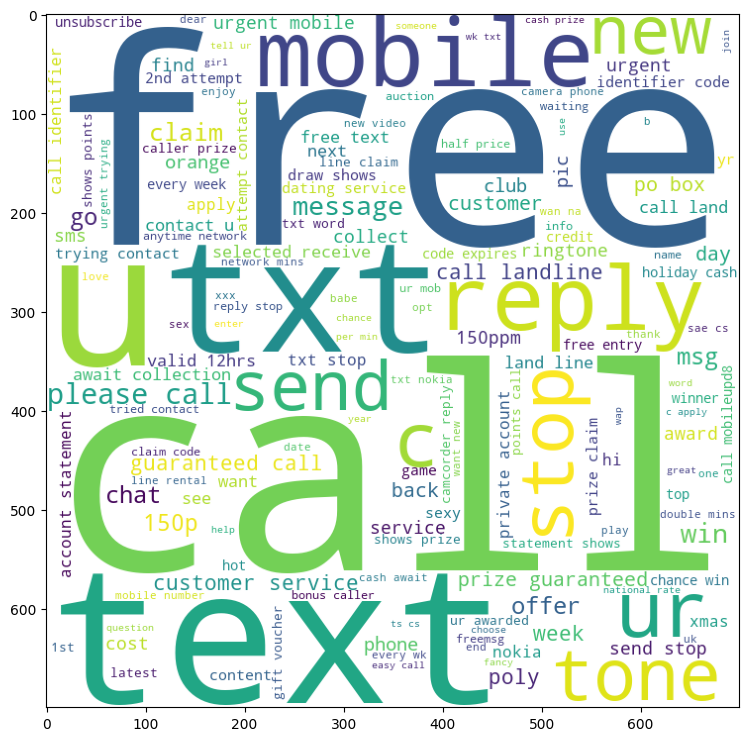

In [32]:
plt.figure(figsize=(16,9))
plt.imshow(spam_wc)

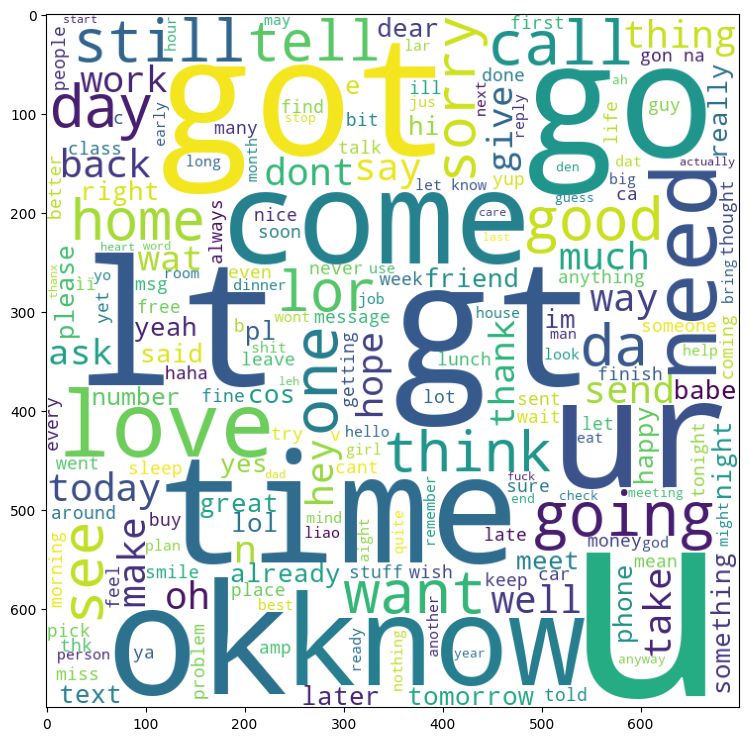

In [33]:
ham_wc=wc.generate(ds[ds['type']==0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(16,9))
plt.imshow(ham_wc)

In [34]:
spam_text=[]
for msg in ds[ds['type']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_text.append(word)
# pd.DataFrame(Counter(spam_text).most_common(30))

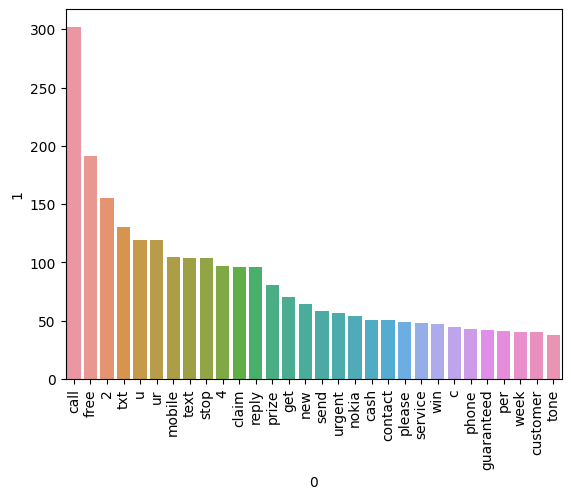

In [35]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_text).most_common(30))[0] ,y= pd.DataFrame(Counter(spam_text).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [36]:
ham_text=[]
for msg in ds[ds['type']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_text.append(word)
# pd.DataFrame(Counter(spam_text).most_common(30))

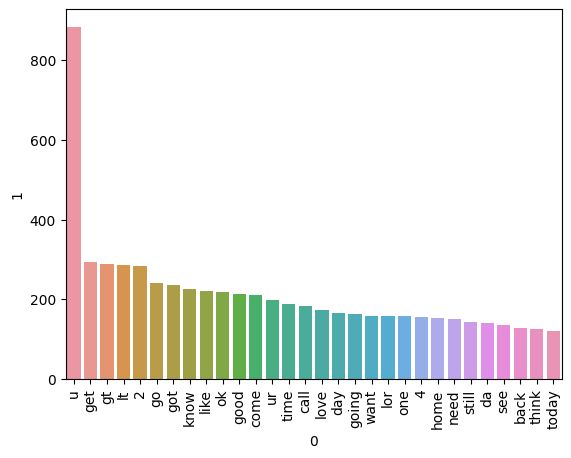

In [37]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_text).most_common(30))[0] ,y= pd.DataFrame(Counter(ham_text).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer()
X=tfidf.fit_transform(ds['transformed_text']).toarray()
X.shape

(5169, 8002)

In [54]:
y=ds['type'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [57]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8936170212765957
[[811  85]
 [ 25 113]]
0.5707070707070707


In [58]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9535783365570599
[[896   0]
 [ 48  90]]
1.0


In [59]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9680851063829787
[[892   4]
 [ 29 109]]
0.9646017699115044


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier

In [ ]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborClassifier()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='11')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
ada=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimator=50,random_state=2)
etc=ExtraTreeClassifier(n_estimator=50,random_state=2)
xgb=XGBClassifier(n_estimator)